In [3]:
import sys
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from transformers import AutoModelForSeq2SeqLM
from transformers import AutoTokenizer
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
print(f'loading tokenizer from t5-small')
tokenizer = AutoTokenizer.from_pretrained('t5-small')

loading tokenizer from t5-small


In [7]:
checkpoint = r'/home/yuvalso/2_b_del/checkpoint-75500/'
print(f'loading model from {checkpoint}...')
model = AutoModelForSeq2SeqLM.from_pretrained(pretrained_model_name_or_path=checkpoint)
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(f'model loaded with {params} parameters')

loading model from /home/yuvalso/2_b_del/checkpoint-75500/...
model loaded with 60506624 parameters


In [8]:
samples_file = r'/home/yuvalso/repository/gir/data/wiki/benchmark_test_small.csv'

In [10]:
df = pd.read_csv(samples_file,dtype=str)
if 'input' not in df.columns:
    print(f'invalid sample file: missing input column in {samples_file} file')
    print(df.head())

In [11]:
def inference(sentence):
    input_ids = tokenizer(sentence, return_tensors="pt").input_ids
    outputs = model.generate(input_ids,
                             max_length=10,
                             num_beams=10,
                             length_penalty=0.0,
                             output_scores=True)
    return tokenizer.batch_decode(outputs, skip_special_tokens=True)

In [12]:
print(f'evaluates {df.shape[0]} samples from {samples_file}')

rows = []
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    if row['s2_sequence'] == row['s2_sequence']:
        row['inference'] = inference(row['input'])[0]
        if row['inference'] and row['inference'] != np.nan:
            rows.append(row)

evaluates 437 samples from /home/yuvalso/repository/gir/data/wiki/benchmark_test_small.csv


100%|██████████| 437/437 [01:03<00:00,  6.91it/s]


In [14]:
out_df = pd.DataFrame(rows)
print(f'{out_df.shape[0]} inference rows out of {df.shape[0]} samples')
out_df[['input', 'inference']].head()

412 inference rows out of 437 samples


,input,inference
0,"human settlement in Kanyakumari district, Tami...",31
1,suburb of Dublin,10030
2,"building in Montana, United States",2
3,"square in Grosseto, Italy",212
4,mountain pass between Zillertal / Tux Alps in ...,0323


In [15]:
accuracy = accuracy_score(y_true=out_df['s2_sequence'], y_pred=out_df['inference'])
print(f'accuracy: {accuracy}')

accuracy: 0.7669902912621359


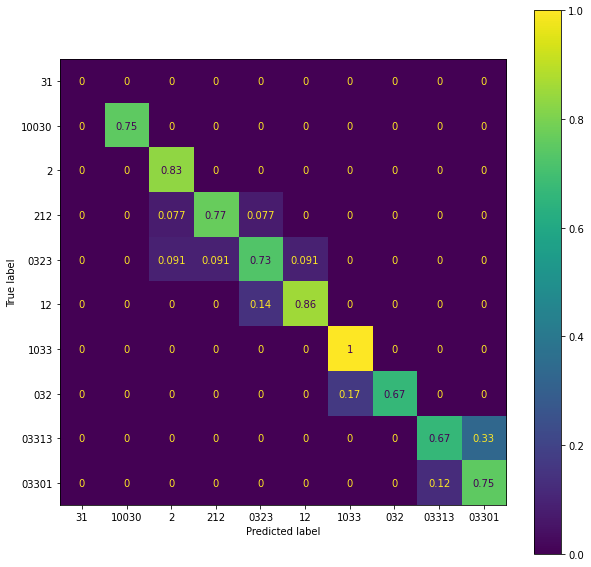

In [29]:
plt.rcParams["figure.figsize"] = (10,10)
cm = confusion_matrix(y_true=out_df['s2_sequence'], y_pred=out_df['inference'], normalize='true')
# cmd = ConfusionMatrixDisplay(cm, display_labels=np.append(out_df['inference'].unique(),'un'))
cmd = ConfusionMatrixDisplay(cm[:10,:10], display_labels=out_df['inference'].unique()[:10])
cmd.plot()

In [ ]:
output_file = samples_file.replace('.csv', '_infer.csv')
print(f'save inference results to {output_file}')
out_df.to_csv(output_file)

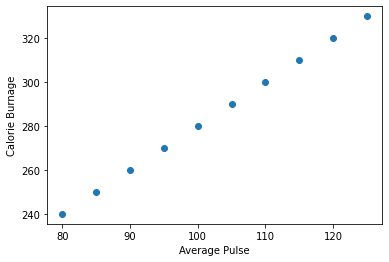

In [5]:
import numpy as np


x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

plt.scatter(x, y)

plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")

plt.show()

In [6]:
type(plt.xlabel)

function